In [ ]:
import pymagicc
from pymagicc import MAGICC6
from pymagicc import rcp26, rcp45, rcp60, rcp85
from pymagicc.io import MAGICCData
import pandas as pd
from pymagicc.scenarios import rcps


In [ ]:
from matplotlib import pyplot as plt


In [ ]:
rcps

<scmdata.ScmRun (timeseries: 644, timepoints: 62)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	    climate_model  ...                                    variable
	0     unspecified  ...  Emissions|CO2|MAGICC Fossil and Industrial
	1     unspecified  ...                  Emissions|CO2|MAGICC AFOLU
	2     unspecified  ...                               Emissions|CH4
	3     unspecified  ...                               Emissions|N2O
	4     unspecified  ...                               Emissions|SOx
	..            ...  ...                                         ...
	639   unspecified  ...                           Emissions|HFC134a
	640   unspecified  ...                           Emissions|HFC143a
	641   unspecified  ...                          Emissions|HFC227ea
	642   unspecified  ...                          Emissions|HFC245fa
	643   unspecified  ...                               Emissions|SF6
	
	[644 rows x 7 columns]

In [ ]:
rcps.to_csv('rcps_dataset.csv')


In [ ]:
data_df=pd.read_csv('rcps_dataset.csv')


In [ ]:
data_df.region.unique()

array(['World|Bunkers', 'World|R5LAM', 'World|R5MAF', 'World|R5ASIA',
       'World|R5REF', 'World|R5OECD', 'World'], dtype=object)

In [ ]:
data_df.scenario.unique()

array(['RCP26', 'RCP45', 'RCP60', 'RCP85'], dtype=object)

In [ ]:
data_filtered = data_df[(data_df.region == 'World') & (data_df.variable == 'Emissions|CO2|MAGICC Fossil and Industrial')]
# data_filtered = data_df[(data_df.region == 'World') & (data_df.variable == 'Surface Temperature')]

In [ ]:
data_filtered= data_filtered.drop(['climate_model', 'model', 'region', 'todo', 'unit', 'variable'], axis=1)

In [ ]:
data_filtered

,scenario,2000-01-01 00:00:00,2001-01-01 00:00:00,2002-01-01 00:00:00,2003-01-01 00:00:00,2004-01-01 00:00:00,2005-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2010-01-01 00:00:00,2020-01-01 00:00:00,2030-01-01 00:00:00,2040-01-01 00:00:00,2050-01-01 00:00:00,2060-01-01 00:00:00,2070-01-01 00:00:00,2080-01-01 00:00:00,2090-01-01 00:00:00,2100-01-01 00:00:00,2110-01-01 00:00:00,2120-01-01 00:00:00,2125-01-01 00:00:00,2130-01-01 00:00:00,2140-01-01 00:00:00,2148-01-01 00:00:00,2149-01-01 00:00:00,2150-01-01 00:00:00,2151-01-01 00:00:00,2152-01-01 00:00:00,2153-01-01 00:00:00,2154-01-01 00:00:00,2155-01-01 00:00:00,2160-01-01 00:00:00,2165-01-01 00:00:00,2170-01-01 00:00:00,2175-01-01 00:00:00,2180-01-01 00:00:00,2185-01-01 00:00:00,2190-01-01 00:00:00,2195-01-01 00:00:00,2200-01-01 00:00:00,2210-01-01 00:00:00,2220-01-01 00:00:00,2230-01-01 00:00:00,2240-01-01 00:00:00,2248-01-01 00:00:00,2249-01-01 00:00:00,2250-01-01 00:00:00,2255-01-01 00:00:00,2260-01-01 00:00:00,2270-01-01 00:00:00,2275-01-01 00:00:00,2280-01-01 00:00:00,2290-01-01 00:00:00,2300-01-01 00:00:00,2325-01-01 00:00:00,2350-01-01 00:00:00,2375-01-01 00:00:00,2400-01-01 00:00:00,2425-01-01 00:00:00,2450-01-01 00:00:00,2475-01-01 00:00:00,2500-01-01 00:00:00
138,RCP26,6.735,6.8960,6.949,7.286,7.6720,7.971,8.1426,8.3135,8.8214,9.2876,7.1569,4.5349,3.1855,1.4192,0.1156,-0.4329,-0.8704,-0.9308,NaN,NaN,-0.9308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.9308
299,RCP45,6.735,6.8960,6.949,7.286,7.6720,7.971,8.0985,8.2259,8.6074,9.8715,10.9533,11.3380,11.0313,9.4012,7.1182,4.1822,4.1926,4.2030,3.0816,2.2845,NaN,1.964,1.7094,1.5000,1.5353,1.5468,1.5532,1.5547,1.5526,1.5482,1.5419,1.4944,NaN,1.3814,NaN,1.2785,NaN,1.1901,NaN,1.1148,1.0504,0.9950,0.9472,0.9057,NaN,NaN,0.8693,NaN,0.8373,0.8089,NaN,0.7836,0.7608,0.7403,NaN,0.6611,NaN,0.6054,NaN,0.5621,NaN,0.6745
460,RCP60,6.735,6.8959,6.949,7.286,7.6719,7.971,8.0809,8.1900,8.5115,8.9504,9.9952,11.5544,13.0438,14.8244,16.5060,17.2806,14.3131,13.7533,NaN,NaN,8.6266,NaN,NaN,3.9101,3.5678,3.5062,3.4373,3.3717,3.3114,3.2545,3.2004,2.9612,2.7604,2.5873,2.4357,2.3018,2.1829,2.0769,1.982,1.8969,1.7514,1.6327,1.5350,1.4539,NaN,NaN,1.3860,NaN,NaN,NaN,1.2578,NaN,NaN,1.1686,1.1027,1.0509,1.0082,0.9713,0.9383,0.9082,0.8803,0.8539
621,RCP85,6.735,6.8960,6.949,7.286,7.6720,7.971,8.1616,8.3523,8.9256,11.5376,13.8390,16.7866,20.2046,23.5962,25.9622,27.4061,28.3367,28.7401,NaN,NaN,28.7401,NaN,NaN,NaN,NaN,28.7401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,2.088,2.0459,2.067,2.1246,NaN,2.0815,NaN,NaN,1.9941,NaN,1.8886,NaN,1.7632,NaN,1.6171,NaN,1.4845


In [ ]:
data_frame= data_filtered.T.reset_index().drop(0)

In [ ]:
data_frame.dropna(inplace=True)

In [ ]:
data_frame.reindex()
data_frame.columns = [ 'year','RCP26', 'RCP45', 'RCP60', 'RCP85']
data_frame['year']=pd.to_datetime(data_frame['year'], errors = 'coerce')


In [ ]:
df=data_frame
df.dropna(inplace=True)


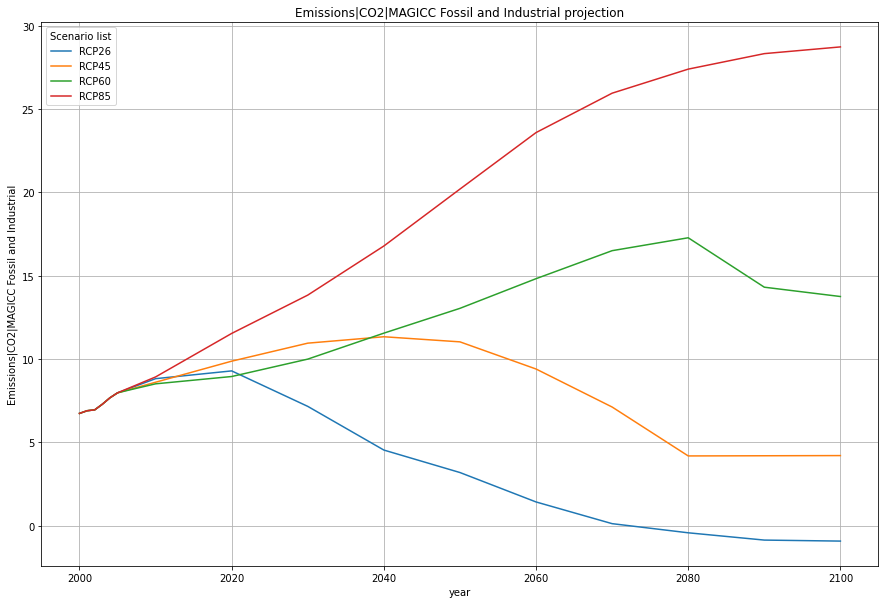

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(df['year'], df['RCP26'], label='RCP26')
plt.plot(df['year'], df['RCP45'], label='RCP45')
plt.plot(df['year'], df['RCP60'], label='RCP60')
plt.plot(df['year'], df['RCP85'], label='RCP85')
plt.legend(title='Scenario list')
plt.xlabel('year')
plt.ylabel('Emissions|CO2|MAGICC Fossil and Industrial')
plt.grid()
plt.title("Emissions|CO2|MAGICC Fossil and Industrial projection")
plt.show()

In [ ]:
with MAGICC6() as magicc:
    data = magicc.run(rcp26)
    for rcp in [rcp45, rcp60, rcp85]:
        data.append(magicc.run(rcp), inplace=True)


/usr/local/lib/python3.7/dist-packages/pymagicc/core.py:438: UserWarning: magicc logged a ERROR message. Check the 'stderr' key of the result's `metadata` attribute.
  "result's `metadata` attribute.".format(level)
/usr/local/lib/python3.7/dist-packages/pymagicc/core.py:438: UserWarning: magicc logged a ERROR message. Check the 'stderr' key of the result's `metadata` attribute.
  "result's `metadata` attribute.".format(level)
/usr/local/lib/python3.7/dist-packages/pymagicc/core.py:438: UserWarning: magicc logged a ERROR message. Check the 'stderr' key of the result's `metadata` attribute.
  "result's `metadata` attribute.".format(level)
/usr/local/lib/python3.7/dist-packages/pymagicc/core.py:438: UserWarning: magicc logged a ERROR message. Check the 'stderr' key of the result's `metadata` attribute.
  "result's `metadata` attribute.".format(level)


In [ ]:
data.to_csv('totalrcp_dataset.csv')

In [ ]:
data_dfrm=pd.read_csv('totalrcp_dataset.csv')

In [ ]:
data_dfrm.region.unique()

array(['World', 'World|Northern Hemisphere|Ocean',
       'World|Northern Hemisphere|Land',
       'World|Southern Hemisphere|Ocean',
       'World|Southern Hemisphere|Land'], dtype=object)

In [ ]:
data_dfrm.scenario.unique()

array(['RCP26', 'RCP45', 'RCP60', 'RCP85'], dtype=object)

In [ ]:
datafrm_filtered = data_dfrm[(data_dfrm.region == 'World') & (data_dfrm.variable == 'Surface Temperature')]


In [ ]:
datafrm_filtered

,climate_model,model,region,scenario,todo,unit,variable,1765-01-01 00:00:00,1766-01-01 00:00:00,1767-01-01 00:00:00,1768-01-01 00:00:00,1769-01-01 00:00:00,1770-01-01 00:00:00,1771-01-01 00:00:00,1772-01-01 00:00:00,1773-01-01 00:00:00,1774-01-01 00:00:00,1775-01-01 00:00:00,1776-01-01 00:00:00,1777-01-01 00:00:00,1778-01-01 00:00:00,1779-01-01 00:00:00,1780-01-01 00:00:00,1781-01-01 00:00:00,1782-01-01 00:00:00,1783-01-01 00:00:00,1784-01-01 00:00:00,1785-01-01 00:00:00,1786-01-01 00:00:00,1787-01-01 00:00:00,1788-01-01 00:00:00,1789-01-01 00:00:00,1790-01-01 00:00:00,1791-01-01 00:00:00,1792-01-01 00:00:00,1793-01-01 00:00:00,1794-01-01 00:00:00,1795-01-01 00:00:00,1796-01-01 00:00:00,1797-01-01 00:00:00,...,2061-01-01 00:00:00,2062-01-01 00:00:00,2063-01-01 00:00:00,2064-01-01 00:00:00,2065-01-01 00:00:00,2066-01-01 00:00:00,2067-01-01 00:00:00,2068-01-01 00:00:00,2069-01-01 00:00:00,2070-01-01 00:00:00,2071-01-01 00:00:00,2072-01-01 00:00:00,2073-01-01 00:00:00,2074-01-01 00:00:00,2075-01-01 00:00:00,2076-01-01 00:00:00,2077-01-01 00:00:00,2078-01-01 00:00:00,2079-01-01 00:00:00,2080-01-01 00:00:00,2081-01-01 00:00:00,2082-01-01 00:00:00,2083-01-01 00:00:00,2084-01-01 00:00:00,2085-01-01 00:00:00,2086-01-01 00:00:00,2087-01-01 00:00:00,2088-01-01 00:00:00,2089-01-01 00:00:00,2090-01-01 00:00:00,2091-01-01 00:00:00,2092-01-01 00:00:00,2093-01-01 00:00:00,2094-01-01 00:00:00,2095-01-01 00:00:00,2096-01-01 00:00:00,2097-01-01 00:00:00,2098-01-01 00:00:00,2099-01-01 00:00:00,2100-01-01 00:00:00
10,MAGICC6,IMAGE,World,RCP26,not_relevant,K,Surface Temperature,0.0,-0.000673,0.007998,0.017261,0.013609,-0.00408,-0.002612,0.00634,0.00933,0.010767,0.010535,0.013123,0.019322,0.026474,0.0298,0.0315,0.031377,0.028073,0.017163,-0.015119,-0.035147,-0.009934,0.010634,0.022968,0.02752,0.008079,-0.029415,-0.021311,-0.00626,0.002707,0.004931,0.001572,0.001065,...,1.597787,1.597343,1.596821,1.596228,1.595561,1.594817,1.593989,1.593073,1.592062,1.591096,1.590245,1.589477,1.588759,1.588079,1.587428,1.586803,1.586198,1.585608,1.585030,1.584340,1.583458,1.582556,1.581636,1.580687,1.579705,1.578692,1.577646,1.576568,1.575457,1.574312,1.573144,1.571954,1.570757,1.569563,1.568375,1.567195,1.566024,1.564861,1.563707,1.563254
75,MAGICC6,MiniCAM,World,RCP45,not_relevant,K,Surface Temperature,0.0,-0.000673,0.007998,0.017261,0.013609,-0.00408,-0.002612,0.00634,0.00933,0.010767,0.010535,0.013123,0.019322,0.026474,0.0298,0.0315,0.031377,0.028073,0.017163,-0.015119,-0.035147,-0.009934,0.010634,0.022968,0.02752,0.008079,-0.029415,-0.021311,-0.00626,0.002707,0.004931,0.001572,0.001065,...,2.134814,2.152113,2.168932,2.185279,2.201160,2.216581,2.231551,2.246076,2.260163,2.273719,2.286696,2.299126,2.311014,2.322363,2.333178,2.343462,2.353229,2.362499,2.371285,2.379167,2.385864,2.392123,2.398174,2.404088,2.409914,2.415689,2.421439,2.427180,2.432927,2.438692,2.444483,2.450297,2.456137,2.462005,2.467904,2.473833,2.479793,2.485785,2.491807,2.497057
140,MAGICC6,AIM,World,RCP60,not_relevant,K,Surface Temperature,0.0,-0.000673,0.007998,0.017261,0.013609,-0.00408,-0.002612,0.00634,0.00933,0.010767,0.010535,0.013123,0.019322,0.026474,0.0298,0.0315,0.031377,0.028073,0.017163,-0.015119,-0.035147,-0.009934,0.010634,0.022968,0.02752,0.008079,-0.029415,-0.021311,-0.00626,0.002707,0.004931,0.001572,0.001065,...,2.053207,2.082521,2.112558,2.143196,2.174361,2.206003,2.238087,2.270586,2.303482,2.336174,2.368301,2.400195,2.431979,2.463684,2.495329,2.526925,2.558483,2.590008,2.621508,2.652341,2.682123,2.711070,2.739153,2.766336,2.792606,2.817964,2.842417,2.865973,2.888646,2.910491,2.931541,2.952031,2.972122,2.991888,3.011381,3.030634,3.049684,3.068583,3.087362,3.102484
205,MAGICC6,MESSAGE,World,RCP85,not_relevant,K,Surface Temperature,0.0,-0.000673,0.007998,0.017261,0.013609,-0.00408,-0.002612,0.00634,0.00933,0.010767,0.010535,0.013123,0.019322,0.026474,0.0298,0.0315,0.031377,0.028073,0.017163,-0.015119,-0.035147,-0.009934,0.010634,0.022968,0.02752,0.008079,-0.029415,-0.021311,-0.00

In [ ]:
datafrm_filtered= datafrm_filtered.drop(['climate_model', 'model', 'region', 'todo', 'unit', 'variable'], axis=1)

In [ ]:
newdatafrm= datafrm_filtered.T.reset_index().drop(0)

In [ ]:
newdatafrm.dropna(inplace=True)

In [ ]:
newdatafrm.reindex()
newdatafrm.columns = [ 'year','RCP26', 'RCP45', 'RCP60', 'RCP85']
newdatafrm['year']=pd.to_datetime(newdatafrm['year'], errors = 'coerce')

In [ ]:
df=newdatafrm


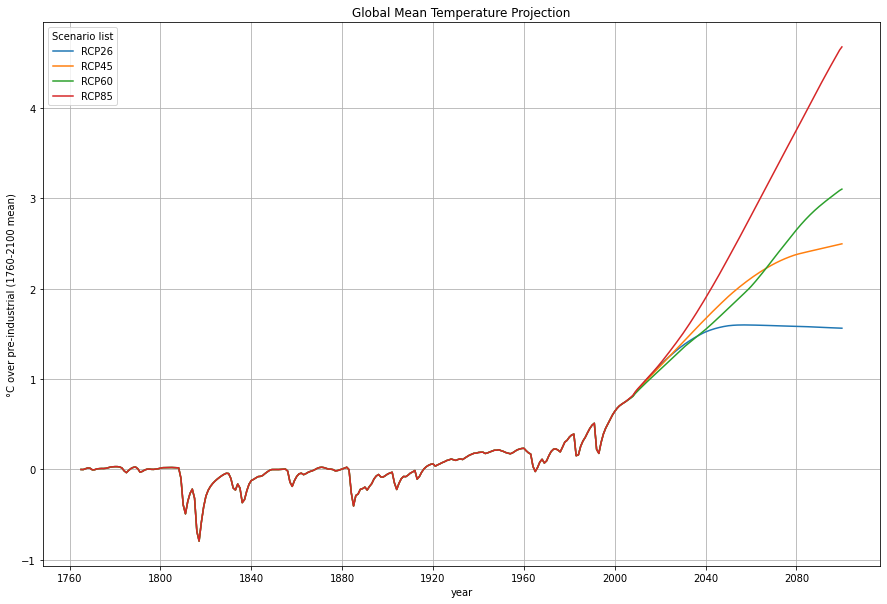

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(df['year'], df['RCP26'], label='RCP26')
plt.plot(df['year'], df['RCP45'], label='RCP45')
plt.plot(df['year'], df['RCP60'], label='RCP60')
plt.plot(df['year'], df['RCP85'], label='RCP85')
plt.legend(title='Scenario list')
plt.xlabel('year')
plt.ylabel('°C over pre-industrial (1760-2100 mean)')
plt.grid()
plt.title("Global Mean Temperature Projection")
plt.show()

In [ ]:
datafrm_filtered2 = data_dfrm[(data_dfrm.region == 'World') & (data_dfrm.variable == 'Atmospheric Concentrations|CO2')]


In [ ]:
datafrm_filtered2

,climate_model,model,region,scenario,todo,unit,variable,1765-01-01 00:00:00,1766-01-01 00:00:00,1767-01-01 00:00:00,1768-01-01 00:00:00,1769-01-01 00:00:00,1770-01-01 00:00:00,1771-01-01 00:00:00,1772-01-01 00:00:00,1773-01-01 00:00:00,1774-01-01 00:00:00,1775-01-01 00:00:00,1776-01-01 00:00:00,1777-01-01 00:00:00,1778-01-01 00:00:00,1779-01-01 00:00:00,1780-01-01 00:00:00,1781-01-01 00:00:00,1782-01-01 00:00:00,1783-01-01 00:00:00,1784-01-01 00:00:00,1785-01-01 00:00:00,1786-01-01 00:00:00,1787-01-01 00:00:00,1788-01-01 00:00:00,1789-01-01 00:00:00,1790-01-01 00:00:00,1791-01-01 00:00:00,1792-01-01 00:00:00,1793-01-01 00:00:00,1794-01-01 00:00:00,1795-01-01 00:00:00,1796-01-01 00:00:00,1797-01-01 00:00:00,...,2061-01-01 00:00:00,2062-01-01 00:00:00,2063-01-01 00:00:00,2064-01-01 00:00:00,2065-01-01 00:00:00,2066-01-01 00:00:00,2067-01-01 00:00:00,2068-01-01 00:00:00,2069-01-01 00:00:00,2070-01-01 00:00:00,2071-01-01 00:00:00,2072-01-01 00:00:00,2073-01-01 00:00:00,2074-01-01 00:00:00,2075-01-01 00:00:00,2076-01-01 00:00:00,2077-01-01 00:00:00,2078-01-01 00:00:00,2079-01-01 00:00:00,2080-01-01 00:00:00,2081-01-01 00:00:00,2082-01-01 00:00:00,2083-01-01 00:00:00,2084-01-01 00:00:00,2085-01-01 00:00:00,2086-01-01 00:00:00,2087-01-01 00:00:00,2088-01-01 00:00:00,2089-01-01 00:00:00,2090-01-01 00:00:00,2091-01-01 00:00:00,2092-01-01 00:00:00,2093-01-01 00:00:00,2094-01-01 00:00:00,2095-01-01 00:00:00,2096-01-01 00:00:00,2097-01-01 00:00:00,2098-01-01 00:00:00,2099-01-01 00:00:00,2100-01-01 00:00:00
5,MAGICC6,IMAGE,World,RCP26,not_relevant,ppm,Atmospheric Concentrations|CO2,278.05158,278.16073,278.28006,278.40604,278.53513,278.66581,278.79969,278.93794,279.08021,279.22615,279.37744,279.53616,279.7,279.86384,280.02256,280.17224,280.31336,280.45,280.58664,280.72776,280.87744,281.03616,281.2,281.36384,281.52256,281.67385,281.81979,281.96206,282.10031,282.23419,282.36383,282.48977,282.61208,...,444.73947,444.46696,444.16030,443.81998,443.44638,443.03991,442.60094,442.12985,441.62701,441.09275,440.52721,439.96874,439.41415,438.86294,438.31408,437.76676,437.22031,436.67412,436.12769,435.58054,435.03241,434.48984,433.95146,433.41662,432.88471,432.35518,431.82755,431.30137,430.77624,430.25178,429.72764,429.21398,428.70944,428.21341,427.72520,427.24422,426.76996,426.30196,425.83982,425.83982
70,MAGICC6,MiniCAM,World,RCP45,not_relevant,ppm,Atmospheric Concentrations|CO2,278.05158,278.16073,278.28006,278.40604,278.53513,278.66581,278.79969,278.93794,279.08021,279.22615,279.37744,279.53616,279.7,279.86384,280.02256,280.17224,280.31336,280.45,280.58664,280.72776,280.87744,281.03616,281.2,281.36384,281.52256,281.67385,281.81979,281.96206,282.10031,282.23419,282.36383,282.48977,282.61208,...,515.08181,516.92829,518.69119,520.37181,521.97169,523.49212,524.93426,526.29913,527.58769,528.80079,529.93937,530.97387,531.90721,532.74061,533.47551,534.11317,534.65467,535.10098,535.45301,535.71165,535.87839,536.09360,536.34575,536.63140,536.94653,537.28811,537.65368,538.04123,538.44909,538.87584,539.32027,539.78132,540.25810,540.74978,541.25563,541.77500,542.30727,542.85190,543.40837,543.40837
135,MAGICC6,AIM,World,RCP60,not_relevant,ppm,Atmospheric Concentrations|CO2,278.05158,278.16073,278.28006,278.40604,278.53513,278.66581,278.79969,278.93794,279.08021,279.22615,279.37744,279.53616,279.7,279.86384,280.02256,280.17224,280.31336,280.45,280.58664,280.72776,280.87744,281.03616,281.2,281.36384,281.52256,281.67385,281.81979,281.96206,282.10031,282.23419,282.36383,282.48977,282.61208,...,519.43420,523.22638,527.07806,530.99157,534.96842,539.00975,543.11650,547.28943,551.52923,555.83649,560.21266,564.61945,569.05919,573.53219,578.03927,582.58116,587.15851,591.77193,596.42199,601.10922,605.83517,610.41759,614.86817,619.19001,623.38748,627.46393,631.42208,635.26415,638.99200,642.60721,646.11101,649.61187,653.10372,656.58521,660.05447,663.51025,666.95160,670.37778,673.78829,673.78829
200,MAGICC6,MESSAGE,World,RCP85,not_relevant,ppm,Atmospheric Concentrations|CO2,

In [ ]:
datafiltered= datafrm_filtered2.drop(['climate_model', 'model', 'region', 'todo', 'unit', 'variable'], axis=1)

In [ ]:
dfrm= datafiltered.T.reset_index().drop(0)

In [ ]:
dfrm.dropna(inplace=True)

In [ ]:
dfrm.reindex()
dfrm.columns = [ 'year','RCP26', 'RCP45', 'RCP60', 'RCP85']
dfrm['year']=pd.to_datetime(newdatafrm['year'], errors = 'coerce')

In [ ]:
df=dfrm


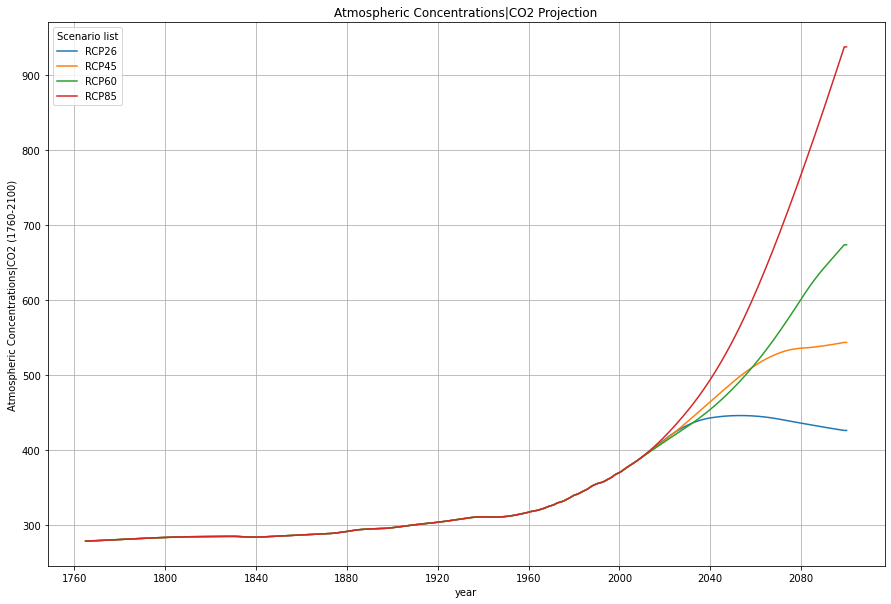

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(df['year'], df['RCP26'], label='RCP26')
plt.plot(df['year'], df['RCP45'], label='RCP45')
plt.plot(df['year'], df['RCP60'], label='RCP60')
plt.plot(df['year'], df['RCP85'], label='RCP85')
plt.legend(title='Scenario list')
plt.xlabel('year')
plt.ylabel('Atmospheric Concentrations|CO2 (1760-2100)')
plt.grid()
plt.title("Atmospheric Concentrations|CO2 Projection")
plt.show()